# Отчёт по лабораторной работе "Задача Коши"

### Выполнил: Безруков Андрей
### Группа: 427

### Цель: Найти решение задачи Коши с помощью неявной схемы Роте.

Неявная схема Роте: $$ 
\begin{cases}
   y_{n+1}=y_n+h(\alpha f(x_n,y_n)+\beta f(x_{n+1},y_{n+1}))\\
   y_0=y^0 & n=0,...,N-1 & \alpha \in (0,1) & \beta=1-\alpha
\end{cases} $$

Значения $y_{n+1}$ будем искать сначала явным методом Эйлера:  
$y_i = y_{i-1} + h f(x_{i-1}, y_{i-1})$, где h-шаг сетки    
и корректировать схемой Роте

Дано: $y''+9y'-9y=cos(3x)*exp(-x)$, $y(0)=1$, $y'(0)=0$, $x\in[0,2]$    
$\alpha=1/3$ $\beta=2/3$ $\varepsilon=0.01$

#### Неявная схема Роте.

In [12]:
E=0.01
bb=2
#начальные условия
x00=0
y00=1
z00=0
#шаг
N=20
hh=(bb-x00)/N
#система
ff(x,y,z)=z
gg(x,y,z)=cos(3x)*exp(-x)-9z+9y
#схема Роте
function Rote(f,g,x0,y0,z0,h,b)
alp=1/3
bet=2/3
k=0
x1=x0+h
y1=[]
z1=[]
y11=[]
z11=[]  
while(x0<=b)
    k+=1
    push!(y1,y0+h*f(x0,y0,z0))
    push!(z1,z0+h*g(x0,y0,z0))
    push!(y11,y0+h*(alp*f(x0,y0,z0)+bet*f(x1,y1[k],z1[k])))
    push!(z11,z0+h*(alp*g(x0,y0,z0)+bet*g(x1,y1[k],z1[k])))
    y0=y11[k]
    z0=z11[k]
    x0+=h
    x1+=h
end
    return y11,z11
end

#выбор шага
ty=zeros(N)
tz=zeros(N)
resy=[]
resz=[]
j=1
while(true)   
    resy1=[]
    resz1=[]
    resy,resz=Rote(ff,gg,x00,y00,z00,hh,bb)
    i=1
    while(i<=N)
        push!(resy1,resy[i*j])
        push!(resz1,resz[i*j])
        i+=1
    end
    if(norm(resy1-ty)<E && norm(resz1-tz)<E)
        break
    end
    ty=resy1
    tz=resz1
    j*=2
    hh/=2
end
println(j)
ty

32


20-element Array{Any,1}:
 1.03844
 1.12155
 1.2267 
 1.34576
 1.4762 
 1.61777
 1.77126
 1.93796
 2.11951
 2.31774
 2.53465
 2.77238
 3.03319
 3.31949
 3.63378
 3.97874
 4.35724
 4.77236
 5.22744
 5.72613

#### Метод Рунге-Кутты 4 порядка: 
Приближенное значение в последующих точках вычисляется по итерационной формуле:
$ y_{n+1} = y_n + {h \over 6}(k_1 + 2k_2 + 2k_3 + k_4) $  
Вычисление нового значения проходит в четыре стадии:  
$ k_{1}=f\left(x_{n},y_{n}\right), $  
$ k_{2}=f\left(x_{n}+{h \over 2},y_{n}+{h \over 2}k_{1}\right), $  
$ k_{3}=f\left(x_{n}+{h \over 2},y_{n}+{h \over 2}k_{2}\right), $  
$ k_{4}=f\left(x_{n}+h,y_{n}+h\ k_{3}\right). $

In [13]:
#начальные условия
Xo=0
Yo=1
Zo=0
#шаг
h=0.1
#система
g(x,y,z)=z
f(x,y,z)=cos(3x)*exp(-x)-9z+9y
rky=[]
while(Xo<=2)
    k1 = h * f(Xo, Yo, Zo);
    q1 = h * g(Xo, Yo, Zo);
    k2 = h * f(Xo + h/2.0, Yo + q1/2.0, Zo + k1/2.0)
    q2 = h * g(Xo + h/2.0, Yo + q1/2.0, Zo + k1/2.0)
    k3 = h * f(Xo + h/2.0, Yo + q2/2.0, Zo + k2/2.0)
    q3 = h * g(Xo + h/2.0, Yo + q2/2.0, Zo + k2/2.0)
    k4 = h * f(Xo + h, Yo + q3, Zo + k3)
    q4 = h * g(Xo + h, Yo + q3, Zo + k3)
    Z1 = Zo + (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
    Y1 = Yo + (q1 + 2.0*q2 + 2.0*q3 + q4)/6.0
    Yo = Y1
    Zo = Z1
    Xo += h
    push!(rky,Y1)
end
rky

20-element Array{Any,1}:
 1.0386 
 1.12155
 1.22653
 1.34542
 1.47568
 1.61707
 1.77034
 1.9368 
 2.11807
 2.31596
 2.53249
 2.76977
 3.03008
 3.31579
 3.62941
 3.97362
 4.35126
 4.7654 
 5.21937
 5.7168 

#### Точное решение.

In [14]:
C1=((10109*sqrt(13))/87126)+(1143/2234)
C2=-((10109*sqrt(13))/87126)+(1143/2234)
ay(u)=C1*exp(3u*(-3+sqrt(13))/2)+C2*exp(3u*(-3-sqrt(13))/2)+(21/1117)exp(-u)sin(3u)-(26/1117)exp(-u)cos(3u)
u0=0
h=0.1
tu=[]
while(u0<=2)
    u0+=h
    push!(tu,ay(u0))
end
tu

20-element Array{Any,1}:
 1.03795
 1.12107
 1.22625
 1.34528
 1.47562
 1.61704
 1.77033
 1.93681
 2.11807
 2.31597
 2.53249
 2.76978
 3.03009
 3.31579
 3.62941
 3.97362
 4.35126
 4.7654 
 5.21937
 5.7168 

#### Нормы разности решений

In [15]:
println("Рунге-Кутта: ",norm(ty-rky)," Точное решение: ",norm(ty-tu))

Рунге-Кутта: 0.01803567036355192 Точное решение: 0.018046703252990428


#### График модуля разности полученного численно решения и точного.

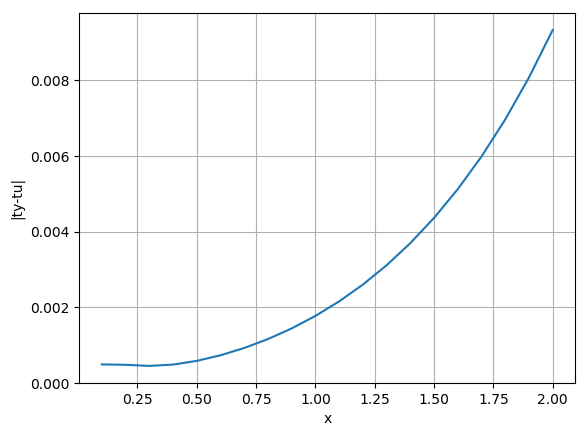

PyObject Text(24.5,0.5,'|ty-tu|')

In [18]:
using PyPlot
A=abs.(ty-tu)
xx=0; x=zeros(20); h=0.1
for i=1:20
    x[i]=xx+h; xx+=h
end
plot(x,A)
grid("on")
xlabel("x")
ylabel("|ty-tu|")

### Вывод: Было найдено решение задачи Коши с помощью неявной схемы Роте.